In [1]:
# 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False


Text(0.5, 0, '시간(분')

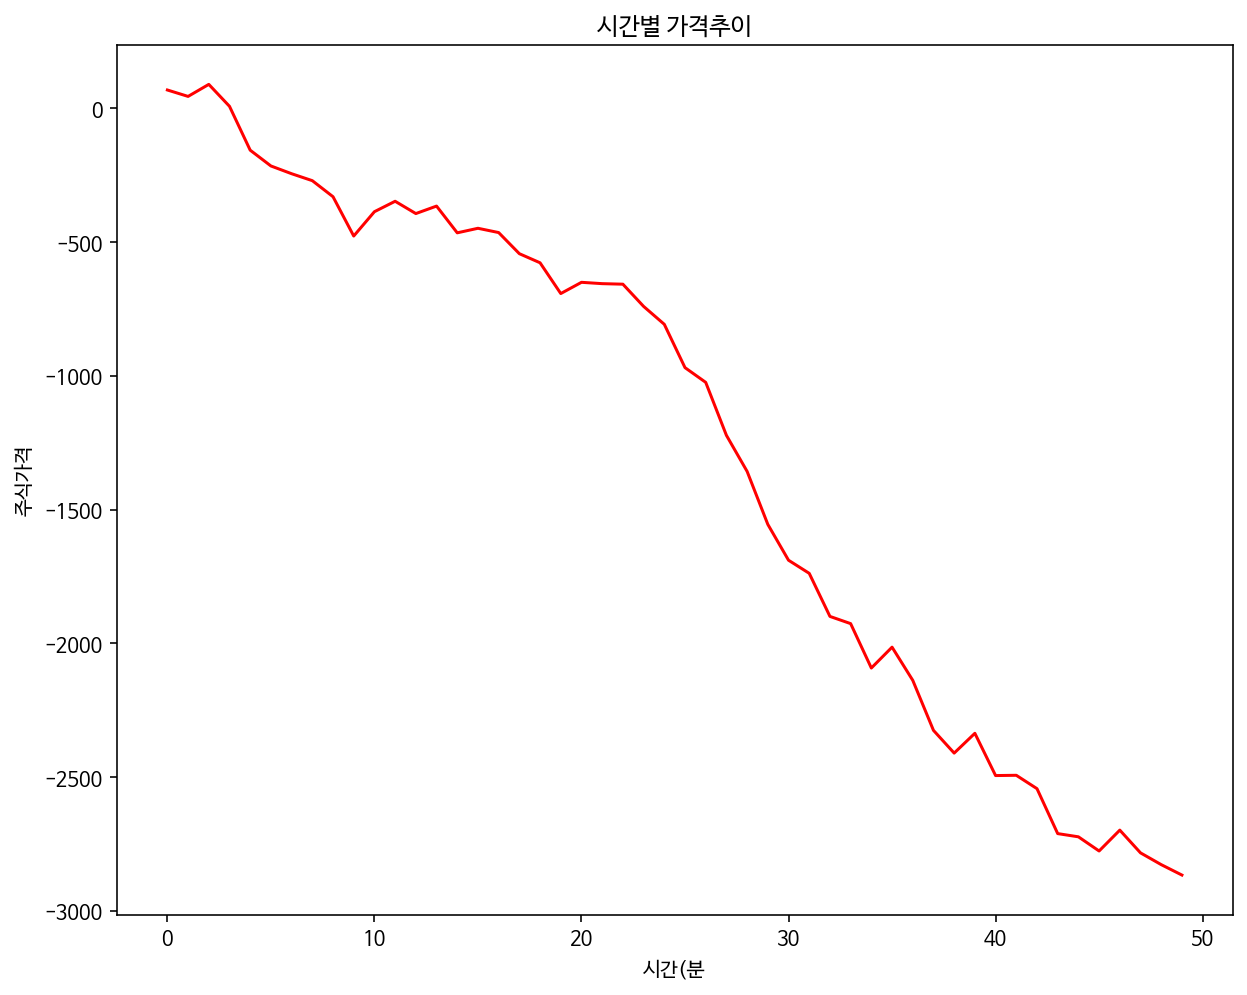

In [2]:
# [테스트]
# 데이터 준비

data = np.random.randint(-200, 100, 50).cumsum()
# 한글을 넣어놓고 그러보면 깨진다
plt.figure(figsize = (10, 8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_auto = pd.read_csv('/content/auto-mpg.csv', header = None)

# 열 이름 지정

df_auto.columns = ['연비(mpg)', '실린더 수', '배기랑', '출력',
                   '차중','가속능력','출시년도','제조국','모델명']
df_auto.head()

,연비(mpg),실린더 수,배기랑,출력,차중,가속능력,출시년도,제조국,모델명
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
# 데이터 자료형 확인
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연비(mpg)  398 non-null    float64
 1   실린더 수    398 non-null    int64  
 2   배기랑      398 non-null    float64
 3   출력       398 non-null    object 
 4   차중       398 non-null    float64
 5   가속능력     398 non-null    float64
 6   출시년도     398 non-null    int64  
 7   제조국      398 non-null    int64  
 8   모델명      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
# 데이터 통계 요약정보 확인
df_auto.describe()

,연비(mpg),실린더 수,배기랑,차중,가속능력,출시년도,제조국
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
# 출력 열의 자료형 변경 (문자열 -> 숫자)
df_auto['출력'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [12]:
df_auto['출력'].replace('?', np.nan, inplace=True)
df_auto.dropna(subset = ['출력'], axis = 0, inplace = True)
df_auto['출력'] = df_auto['출력'].astype('float')

In [13]:
df_auto['출력'].isnull().sum()

0

In [14]:
#분석에 활용할 열(속성)을 선택
ndf = df_auto[['연비(mpg)', '실린더 수', '출력', '차중']]
ndf.head()

,연비(mpg),실린더 수,출력,차중
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


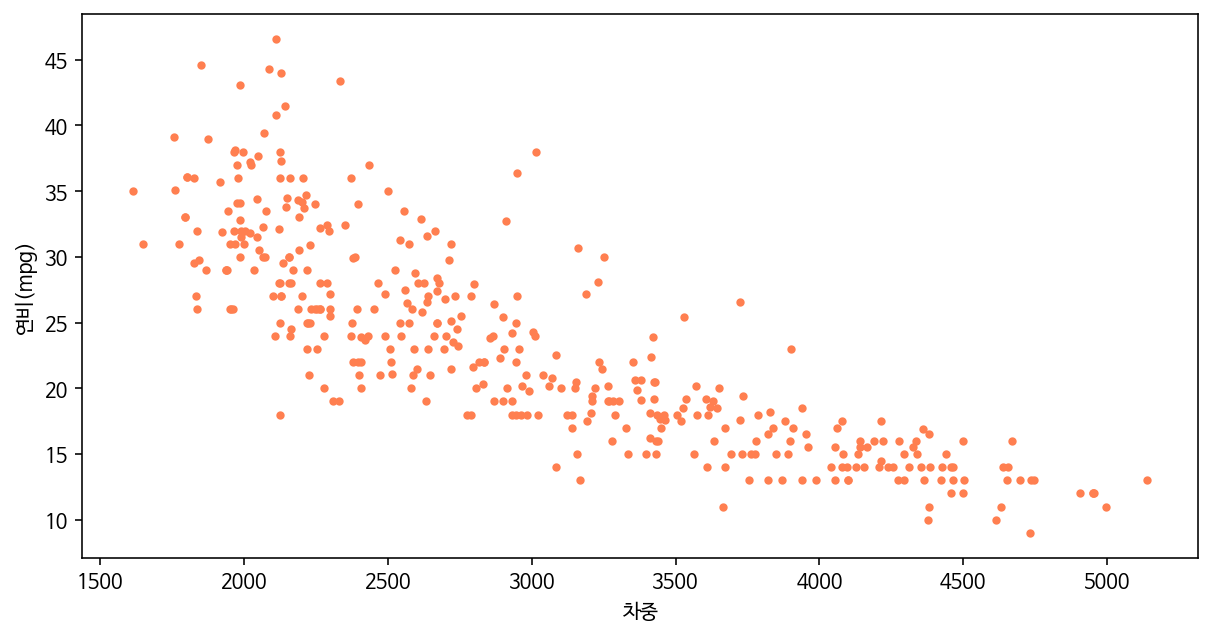

In [16]:
## 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 산점도로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind = 'scatter', x= '차중', y= '연비(mpg)',
         c='coral', s=10, figsize=(10,5))
plt.show()

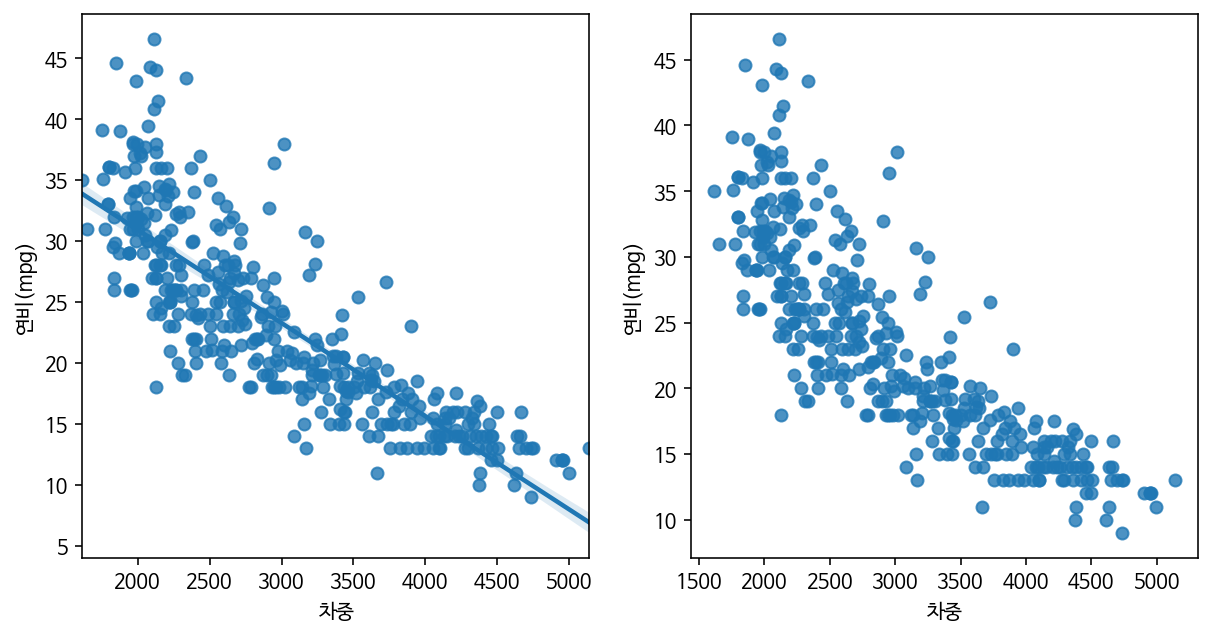

In [20]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = '차중', y='연비(mpg)', data=ndf, ax=ax1) #회귀선 표시
sns.regplot(x = '차중', y='연비(mpg)', data=ndf, ax=ax2,
            fit_reg=False) #회귀선 미표시
plt.show()

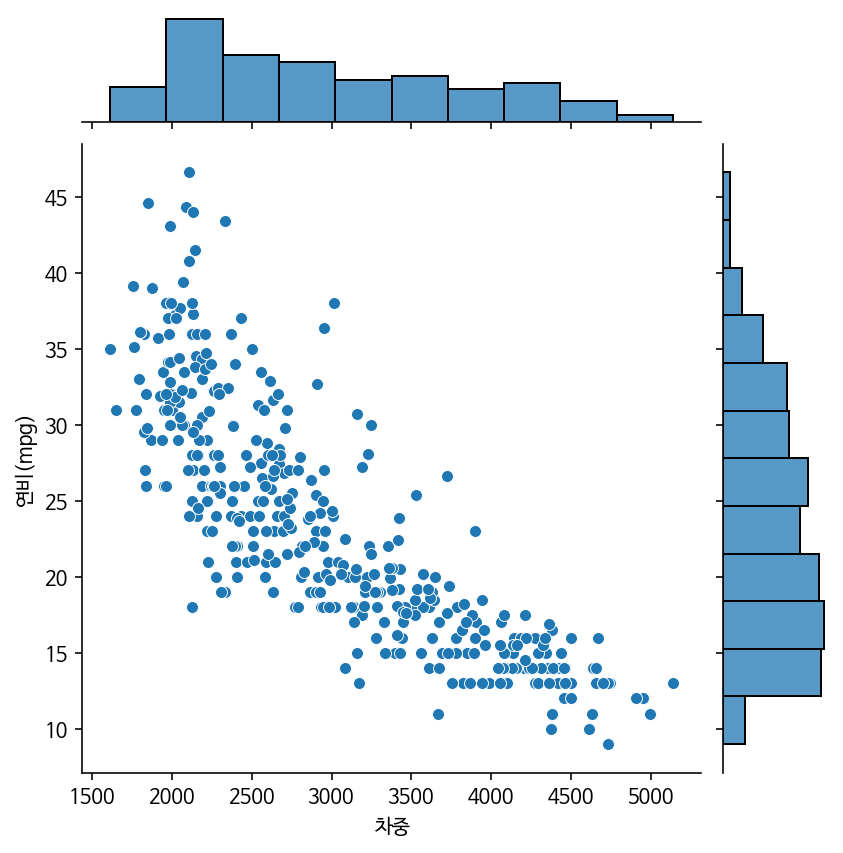

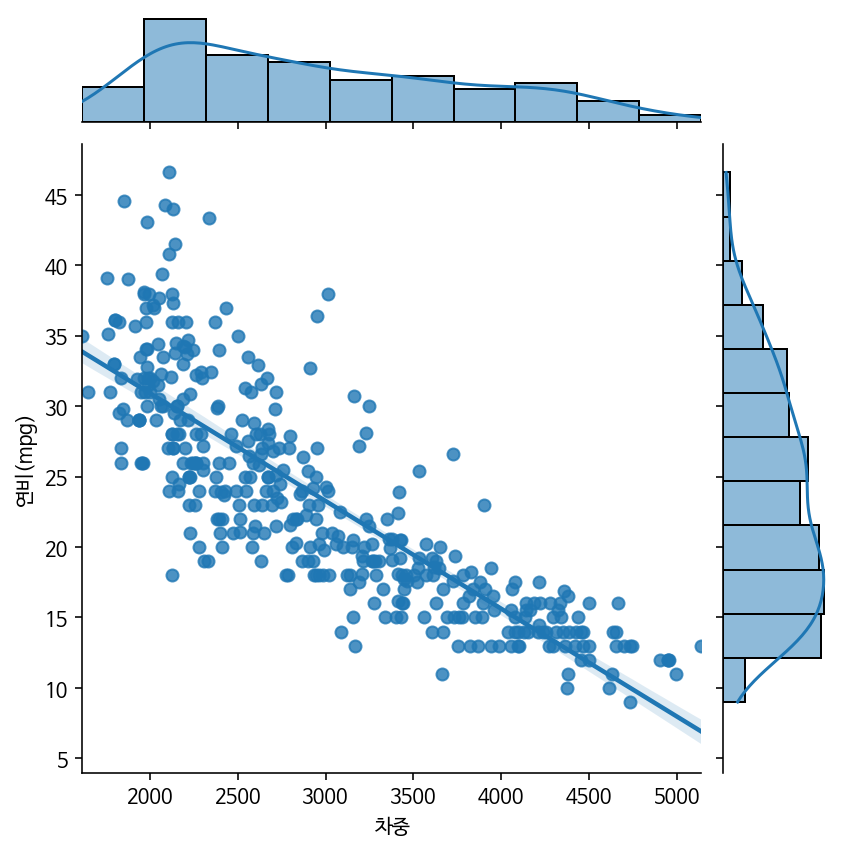

In [22]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x ='차중', y ='연비(mpg)', data=ndf)
sns.jointplot(x='차중', y='연비(mpg)', kind='reg', data=ndf)
plt.show()

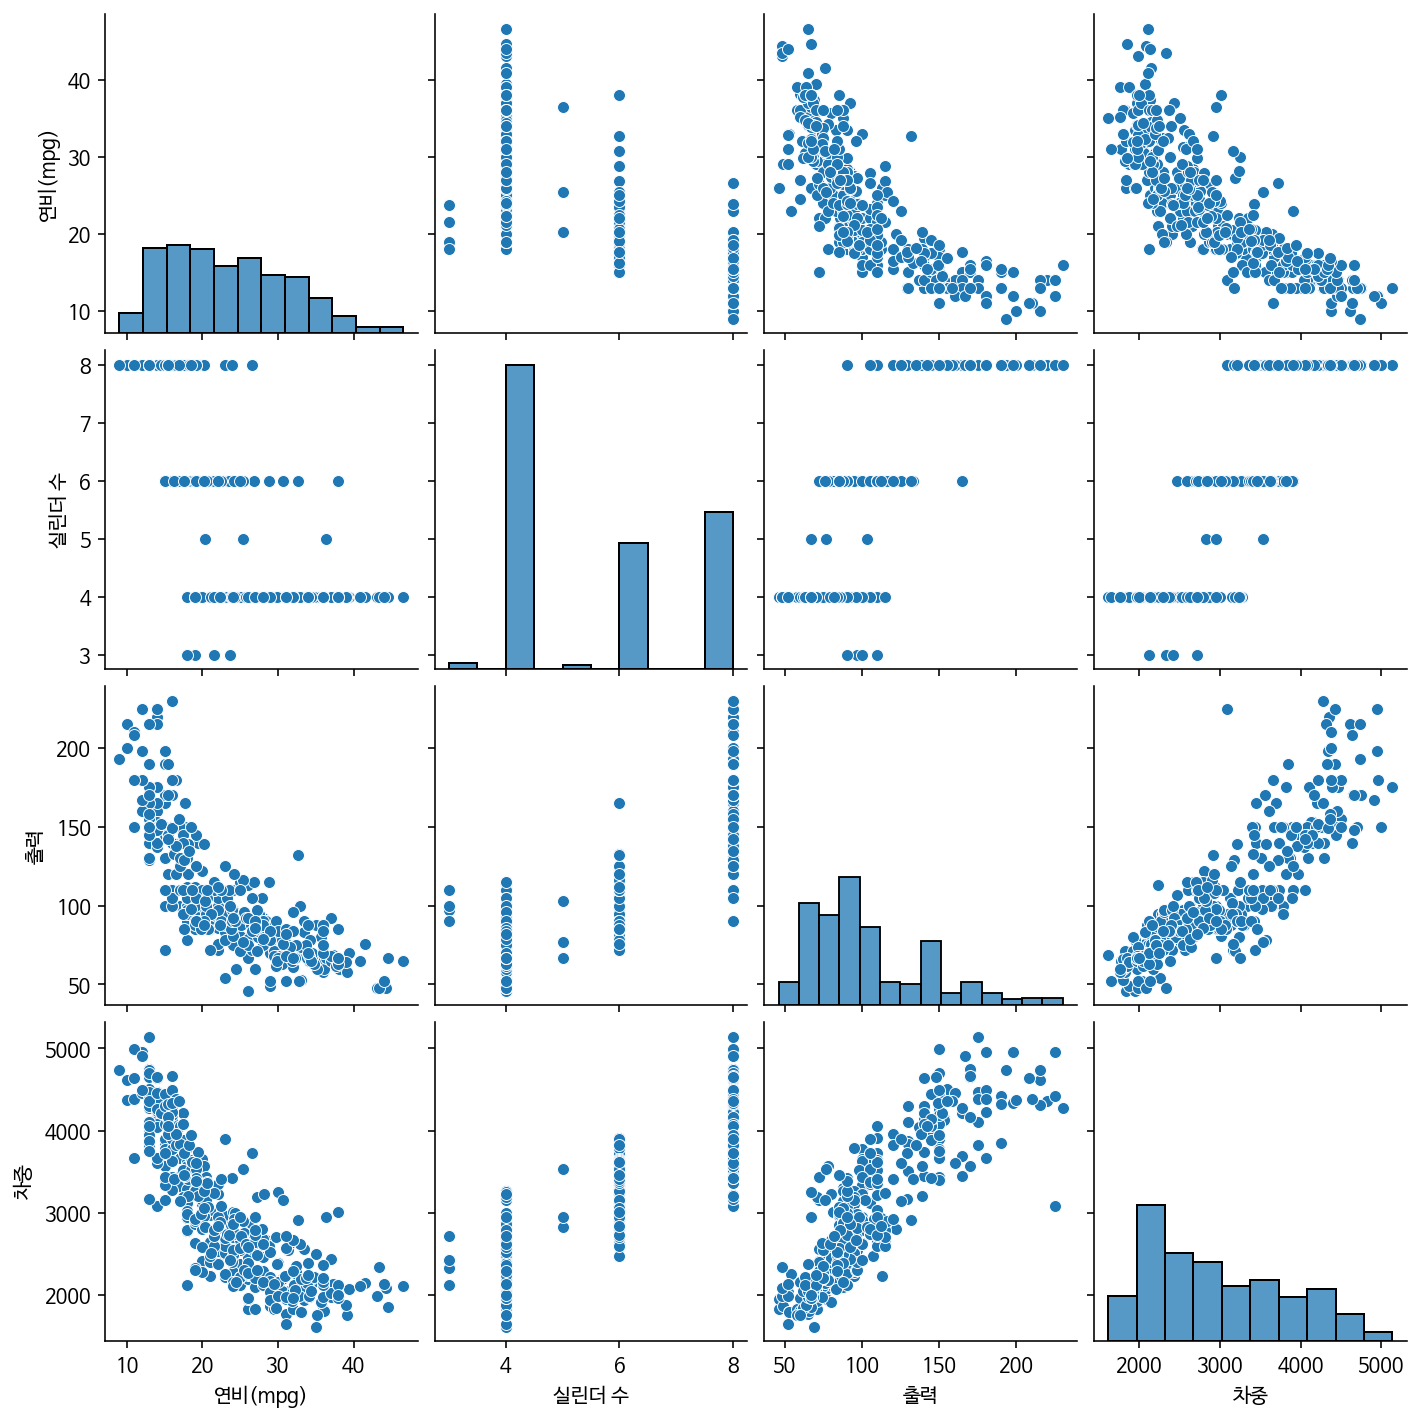

In [23]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()


In [36]:
# 속성(변수) 선택
X = ndf[['차중']] # 독립 변수 X
y = ndf['연비(mpg)'] # 종속 변수 y

In [37]:
# train data와 test data로 구분( 7:3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, #독립변수
                                                    y, # 종속변수
                                                    test_size=0.3, #검증 30%
                                                    random_state=10) #랜덤 추출 값
print('train data 개수:', len(X_train))
print('test data 개수:', len(X_test))

train data 개수: 274
test data 개수: 118


In [38]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기

from sklearn.linear_model import LinearRegression

# 단순회귀 분석 모형 객체 생성

lr = LinearRegression()

# train data 를 가지고 모형 학습

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# 학습을 마친 모형에 test data를 적용하여 결정계수( R-제곱 ) 계산
# R제곱은 바로 다른 말로 설명력 혹은 결정계수 라함
# 독립변수가 종속변수에 대해 얼만큼만의 설명력을 가지게 디는지 나타내는 수지
# 결정 계수 = 1: 히귀직선 y를 완전히 설명가능, 회귀식 정확도 매우높음
# 결정 계수 = 0 : 추정된 회귀직선은 x와 y의 관계 설명 불가

r_square = lr.score(X_test, y_test)
r_square

0.6822458558299322

In [40]:
# 회귀식의 기울기( w )
print('기울기 a:' , lr.coef_) # 기울기를 불러주는 함수


기울기 a: [-0.00775343]


In [41]:
# 회귀식의 y 절편
print('y절편 b:', lr.intercept_)

y절편 b: 46.7103662572801


In [42]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 y값과 비교
y_hat = lr.predict(X_test)
y_hat

array([25.62103211, 27.13295129, 20.19362994, 33.06432652, 15.07636504,
       19.99979415, 16.70458569,  6.85772747, 28.6061033 , 29.04804891,
       20.8449182 , 20.10058876, 25.62103211, 26.66774539, 13.57219929,
       18.23976516, 24.19440068, 29.49774795, 12.78134926, 12.95192476,
       13.9908846 , 31.28103723, 22.37234424, 15.27020083, 18.0769431 ,
       10.78871732, 17.39464111, 30.15678964, 21.39541185, 26.17927919,
       21.64352166, 21.82185059, 26.35760812, 23.35703006, 22.90733103,
       30.62199554, 31.31980439, 21.73656284, 17.42565484, 25.94667624,
       21.81409716, 23.57412615, 30.27309111, 21.66678196, 22.28705649,
       10.60263496, 15.06085818, 32.17268187, 22.24828933, 29.7303509 ,
       29.14884352, 11.82767717, 23.28724918, 13.70400763, 17.54970974,
       24.72938747, 24.11686637, 29.73810433, 30.24207739, 25.62103211,
       31.04843428, 27.00114295, 19.37951962, 23.87650999, 26.04747085,
       32.9635319 ,  7.9664682 , 23.83774283, 21.35664469, 14.69

In [46]:
df_y = pd.DataFrame({'y_hat': y_hat, 'y':y_test})
df_y

,y_hat,y
243,25.621032,21.5
371,27.132951,29.0
300,20.193630,23.9
345,33.064327,35.1
265,15.076365,17.5
...,...,...
384,31.474873,32.0
20,25.993197,25.0
189,15.991270,15.5
60,28.040103,20.0


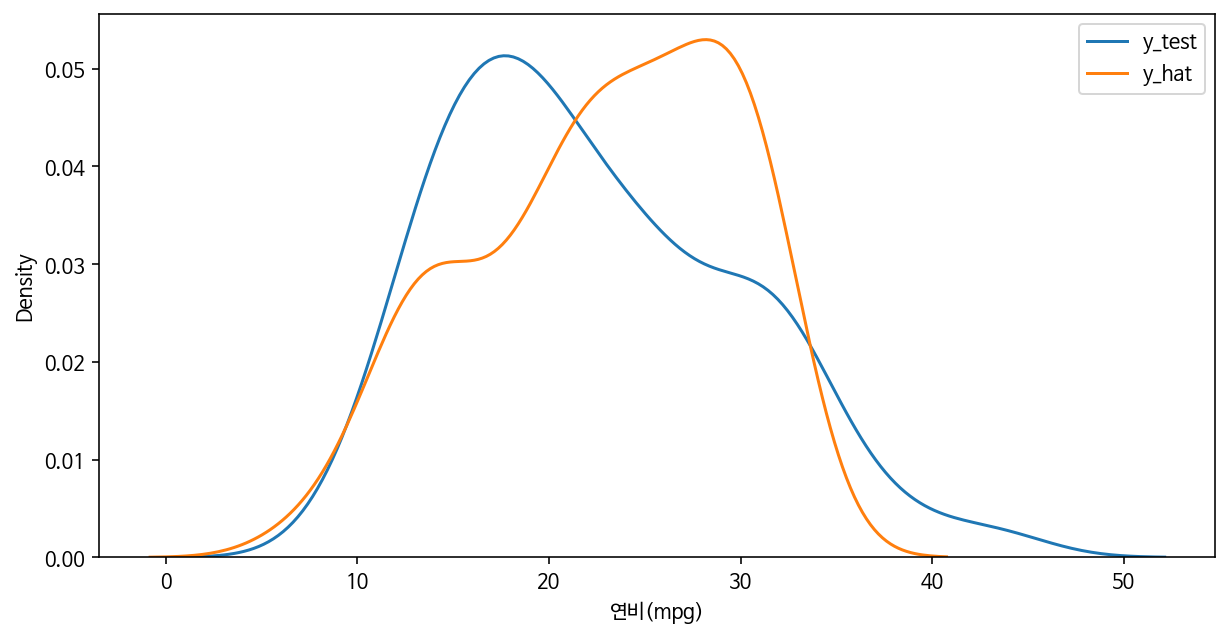

In [47]:
# 오차를 구하고 제곱을 해서 평균을 낼 것
# 평균제곱 오차
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [48]:
((df_y['y_hat']-df_y['y'])**2).mean()

17.99017894105481

In [49]:
# 속성(변수) 선택
X = ndf[['차중']] # 독립 변수 X
y = ndf['연비(mpg)'] # 종속 변수 y
# train data와 test data로 구분( 7:3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, #독립변수
                                                    y, # 종속변수
                                                    test_size=0.3, #검증 30%
                                                    random_state=10) #랜덤 추출 값
print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수: (274, 1)
test data 개수: (118, 1)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 변환
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
print('원 데이터:' , X_train.shape)
print('2차형 변환 데이터', X_train_poly.shape)

원 데이터: (274, 1)
2차형 변환 데이터 (274, 3)


In [52]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
X_test_poly = poly.fit_transform(X_test)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
r_square = pr.score(X_test_poly, y_test)
r_square

0.7087009262975479

In [54]:
# train data의 산점도와 test data로 예측한 회귀선 그래프 출력
x_hat = pr.predict(X_test_poly)

In [56]:
df_y_test = pd.DataFrame({'y_hat': y_hat, 'y': y_test})
df_y_test['차이'] = df_y_test['y_hat']-df_y['y']
df_y_test

,y_hat,y,차이
243,25.621032,21.5,4.121032
371,27.132951,29.0,-1.867049
300,20.193630,23.9,-3.706370
345,33.064327,35.1,-2.035673
265,15.076365,17.5,-2.423635
...,...,...,...
384,31.474873,32.0,-0.525127
20,25.993197,25.0,0.993197
189,15.991270,15.5,0.491270
60,28.040103,20.0,8.040103


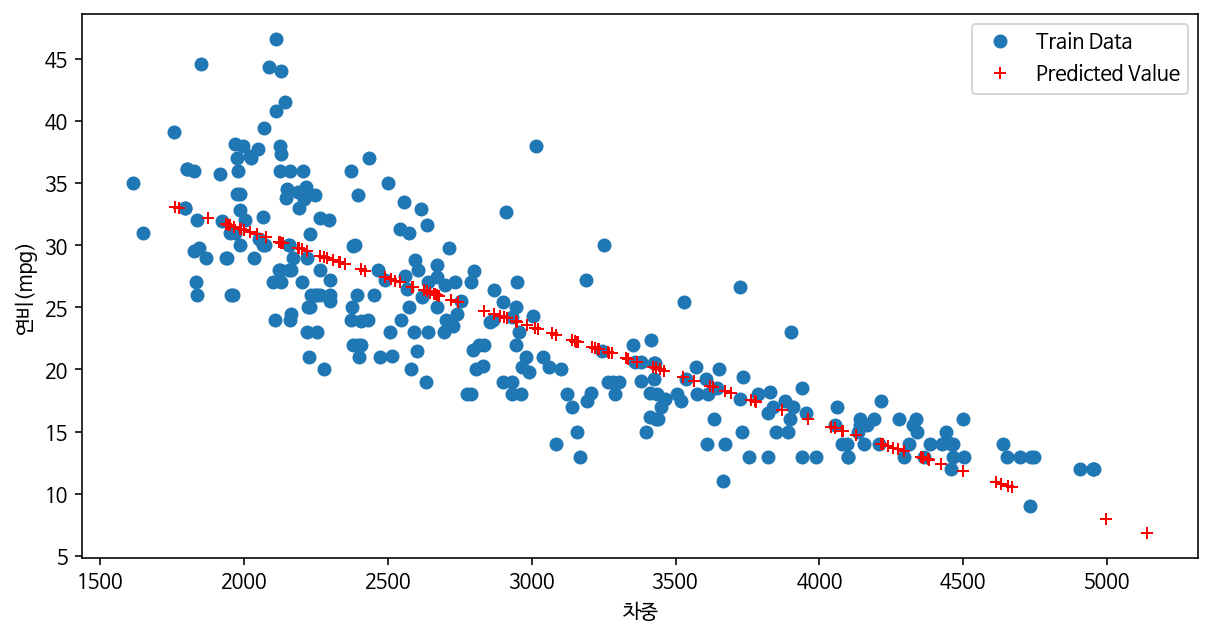

In [57]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')
ax.plot(X_test, y_hat, 'r+', label ='Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('차중')
plt.ylabel('연비(mpg)')
plt.show()
plt.close()

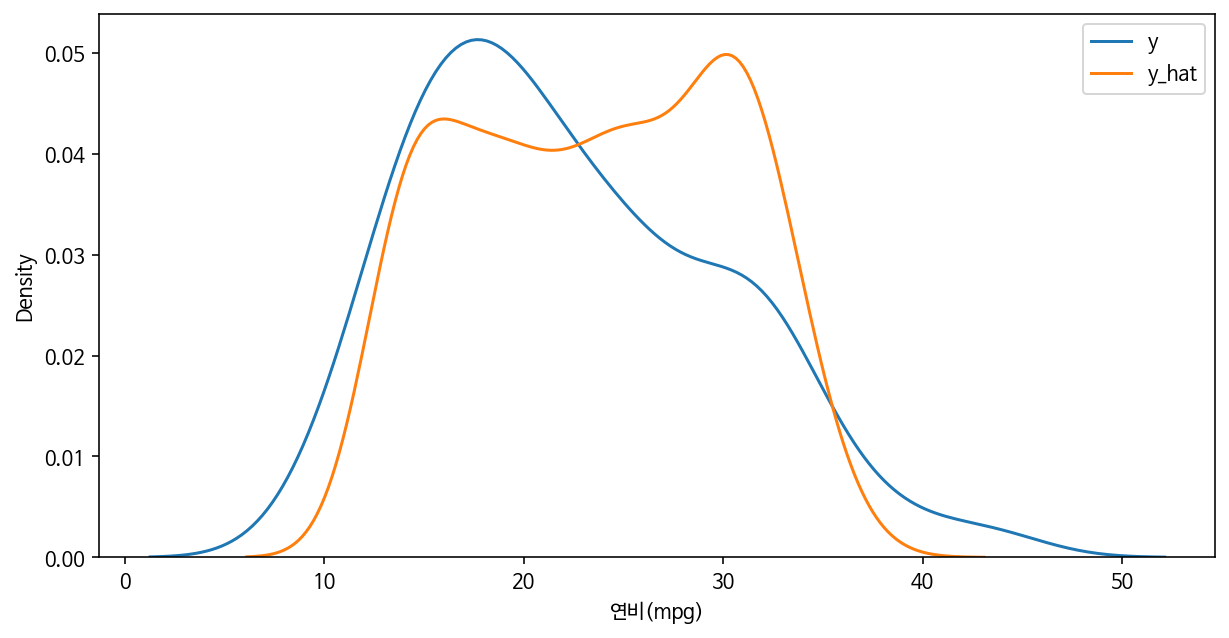

In [62]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat과 실제 값 y와 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [63]:
# 다중회귀분석

# 속성(변수) 선택
X = ndf[['실린더 수','출력','차중']] # 독립 변수 X
y = ndf['연비(mpg)'] # 종속 변수 y
# train data와 test data로 구분( 7:3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, #독립변수
                                                    y, # 종속변수
                                                    test_size=0.3, #검증 30%
                                                    random_state=10) #랜덤 추출 값
print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수: (274, 3)
test data 개수: (118, 3)


In [65]:
# sklearn 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정
r_square = lr.score(X_test, y_test)
r_square

0.6939048496695599

In [66]:
# 회귀식 기울기
print('X 변수의 계수 a:', lr.coef_)

X 변수의 계수 a: [-0.60691288 -0.03714088 -0.00522268]


In [67]:
y_hat = lr.predict(X_test)
y_hat

array([26.30243119, 27.67960352, 20.35480988, 32.5663334 , 15.05079818,
       18.65250234, 16.5189694 ,  8.21482855, 30.00898418, 28.56105525,
       21.63593175, 22.17449944, 26.73546308, 27.06911576, 13.10907653,
       16.81024194, 24.07783306, 29.38394295, 11.27643241, 10.64851363,
       12.83398787, 30.95656774, 23.11048993, 14.9956607 , 16.14345244,
        9.63707709, 19.31184005, 30.31070208, 22.37815073, 25.60054305,
       22.17386758, 22.66539802, 27.34304014, 24.03375623, 23.58227736,
       30.06694949, 31.83692148, 20.6513051 , 16.26186076, 26.65768848,
       22.66017535, 23.58573705, 30.31476048, 24.14617908, 23.74689385,
       11.7401859 , 14.8546484 , 31.8171619 , 22.76694089, 29.65204595,
       28.81465448, 11.37686071, 23.72676593, 13.75497533, 16.3454236 ,
       23.8068028 , 23.83990186, 29.99153659, 30.15796496, 26.51261777,
       31.02273271, 27.92508595, 20.72312738, 23.67799884, 26.50273798,
       32.31273417,  9.89019362, 25.48444753, 23.64014488, 14.31

In [68]:
df_y = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y

,y_hat,y
243,26.302431,21.5
371,27.679604,29.0
300,20.354810,23.9
345,32.566333,35.1
265,15.050798,17.5
...,...,...
384,31.235698,32.0
20,26.800447,25.0
189,16.409892,15.5
60,28.067812,20.0


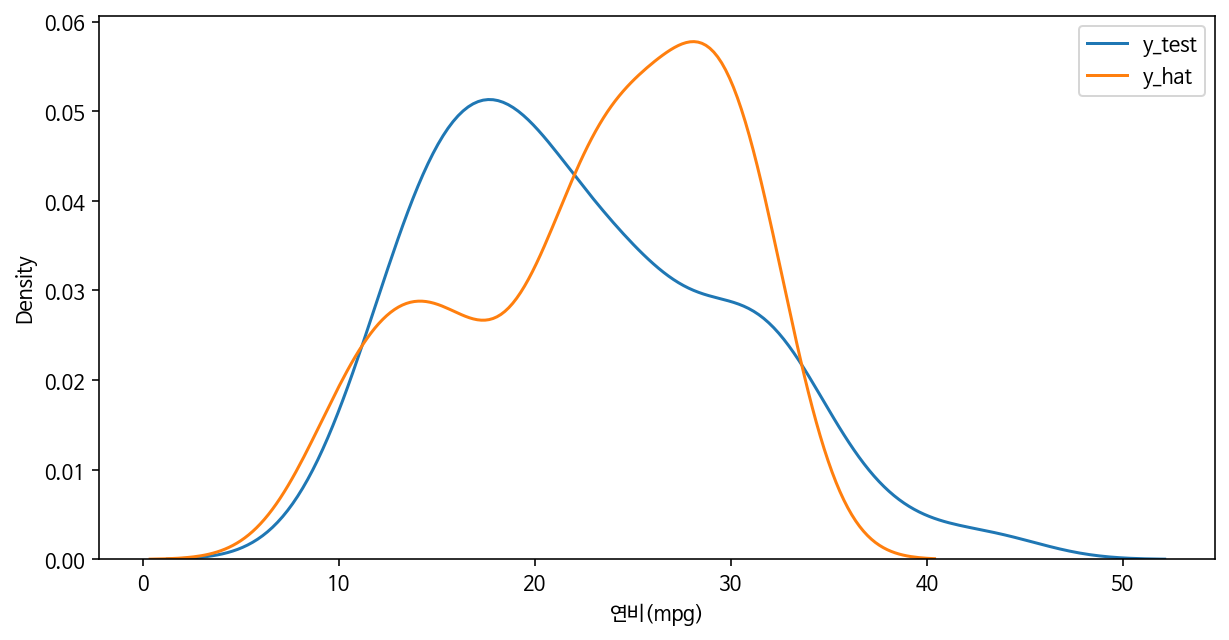

In [69]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()